In [2]:
# ================================================================
# Title: Assignment 8.2 - Solving a System of Linear Equations
# Author: sudipto3331 (GitHub username)
# Date: 2/15/2026
# Modified By: Cyndie Cramer
# Description: Solve the system of equations
# =================================================================

# Import numpy for matrix operations
import numpy as np

# Define matrix A using the coefficients from the system
A = np.array([
    [27, -10,  4, -29],
    [-16,  5, -2,  18],
    [-17,  4, -2,  20],
    [ -7,  2, -1,   8]
])

# Define vector b using the constants on the right-hand side
b = np.array([1, -1, 0, 1])

# Solve the system Ax = b
x = np.linalg.solve(A, b)

# Print the solution
print("Solution vector [x1, x2, x3, x4]:")
print(x)

Solution vector [x1, x2, x3, x4]:
[10.  3. -9.  7.]


In [4]:
# ================================================================
# Title: Assignment 8.2 - Finding the Eigenvalues and Eigenvectors 
# of a Matrix
# Author: LucasBN (GitHub username)
# Date: 2/15/2026
# Modified By: Cyndie Cramer
# Description: Find all of the eigenvalues and eigenvectors of A
# =================================================================

# Import NumPy for matrix and vector operations
import numpy as np  

# Define the matrix A
A = np.array([
    [4, 0, 1],
    [-1, -6, -2],
    [5, 0, 0]
])

# (a) Check if v1 is an eigenvector of A
v1 = np.array([1, 2, 3])

# Multiply the matrix A by the vector v1
Av1 = A @ v1

# Check the scaling factor (lambda) by dividing Av1 by v1 element-wise
lambda1 = Av1 / v1

# Print results
print("Part (a) — check if v1 is an eigenvector")
print("Av1 =", Av1)
print("v1 =", v1)
print("Element-wise Av1 / v1 =", lambda1)
# If all entries in lambda1 are equal, v1 is an eigenvector
# If they are not equal, v1 is NOT an eigenvector

# (b) — check if v2 is an eigenvector
v2 = np.array([0, 1, 0])  # Define the vector to test
Av2 = A @ v2  # Multiply A by v2

# Element-wise division
lambda2 = np.zeros_like(v2, dtype=float)
nonzero_indices = v2 != 0  
lambda2[nonzero_indices] = Av2[nonzero_indices] / v2[nonzero_indices]

print("\nPart (b) — check if v2 is an eigenvector")
print("Av2 =", Av2)
print("v2 =", v2)
print("Scaling factors for nonzero entries:", lambda2)
# If all nonzero entries are equal, v2 is an eigenvector

# (c) — find all eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(A)

print("\nPart (c) — find all eigenvalues and eigenvectors")
print("Eigenvalues of A:", eigvals)
print("Eigenvectors of A (each column corresponds to an eigenvalue):\n", eigvecs)

Part (a) — check if v1 is an eigenvector
Av1 = [  7 -19   5]
v1 = [1 2 3]
Element-wise Av1 / v1 = [ 7.         -9.5         1.66666667]

Part (b) — check if v2 is an eigenvector
Av2 = [ 0 -6  0]
v2 = [0 1 0]
Scaling factors for nonzero entries: [ 0. -6.  0.]

Part (c) — find all eigenvalues and eigenvectors
Eigenvalues of A: [-6.  5. -1.]
Eigenvectors of A (each column corresponds to an eigenvalue):
 [[ 0.          0.69431384 -0.18493168]
 [ 1.         -0.18935832 -0.33287702]
 [ 0.          0.69431384  0.9246584 ]]


T(x) = [2.82842712 0.        ]


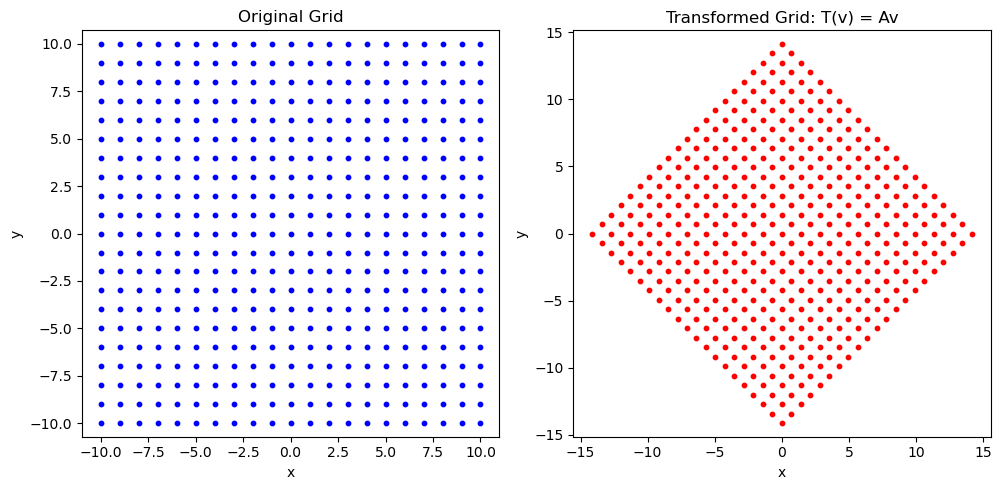

In [1]:
# ================================================================
# Title: Assignment 8.2 - Visualizing a Linear Transformation
# Author: yrevar (GitHub username)
# Date: 2/15/2026
# Modified By: Cyndie Cramer
# Description: 
# =================================================================

# Import NumPy for matrix and vector operations
import numpy as np

# Define the matrix A
A = np.array([
    [np.sqrt(2)/2, -np.sqrt(2)/2],
    [np.sqrt(2)/2,  np.sqrt(2)/2]
])

# Define the vector x
x = np.array([2, -2])

# Apply the transformation T
Tx = A @ x  # Matrix-vector multiplication

print("T(x) =", Tx)

import matplotlib.pyplot as plt

# Create a grid of points
x_vals = np.arange(-10, 11, 1)
y_vals = np.arange(-10, 11, 1)
X, Y = np.meshgrid(x_vals, y_vals)

# Flatten the grid into a list of vectors
vectors = np.vstack([X.ravel(), Y.ravel()])

# Apply the linear transformation to all vectors
transformed_vectors = A @ vectors

# Reshape back for plotting
X_new = transformed_vectors[0, :].reshape(X.shape)
Y_new = transformed_vectors[1, :].reshape(Y.shape)

# Plot the original grid
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X, Y, color='blue', s=10)
plt.title("Original Grid")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')

# Plot the transformed grid
plt.subplot(1,2,2)
plt.scatter(X_new, Y_new, color='red', s=10)
plt.title("Transformed Grid: T(v) = Av")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')

plt.tight_layout()
plt.show()

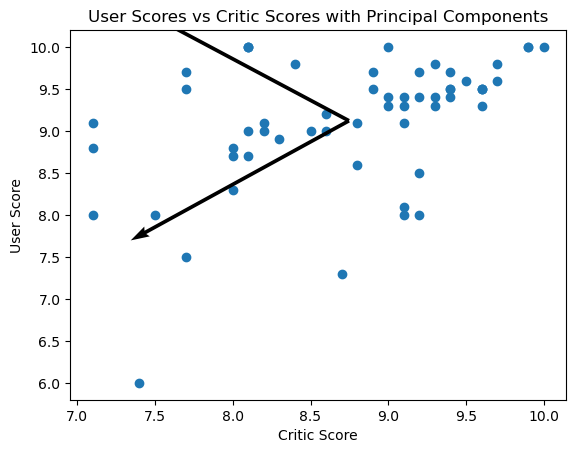

In [5]:
# ================================================================
# Title: Assignment 8.2 - Principal Component Analysis
# Author: jakevdp (GitHub username)
# Date: 2/19/2026
# Modified By: Cyndie Cramer
# Description: Make a scatterplot of the user scores versus 
# critics scores. Then sketch the approximate directions of 
# the first and second principal components.
# =================================================================

# Import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\cyndi\OneDrive - Bellevue University\Data Science\video_game_data.csv"
df = pd.read_csv(file_path)

# Extract the relevant columns
critic_scores = df["critic_score"]
user_scores = df["user_score"]

# Stack into 2D array
X = np.vstack((critic_scores, user_scores))

# Center the data
mean_vector = np.mean(X, axis=1).reshape(2, 1)
X_centered = X - mean_vector

# Covariance matrix
cov_matrix = np.cov(X_centered)

# Eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(cov_matrix)

# Sort eigenvectors by largest eigenvalue first
sorted_indices = np.argsort(eigvals)[::-1]
eigvecs = eigvecs[:, sorted_indices]

# First and second principal components
pc1 = eigvecs[:, 0]
pc2 = eigvecs[:, 1]

# Plot
plt.figure()
plt.scatter(critic_scores, user_scores)

# Scale arrows for visibility
scale_factor = 2

# Draw PC1
plt.quiver(mean_vector[0], mean_vector[1],
           pc1[0]*scale_factor, pc1[1]*scale_factor,
           angles='xy', scale_units='xy', scale=1)

# Draw PC2
plt.quiver(mean_vector[0], mean_vector[1],
           pc2[0]*scale_factor, pc2[1]*scale_factor,
           angles='xy', scale_units='xy', scale=1)

plt.xlabel("Critic Score")
plt.ylabel("User Score")
plt.title("User Scores vs Critic Scores with Principal Components")
plt.show()